In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict,Counter
from random import sample
from sklearn import datasets
from sklearn.model_selection import train_test_split
import NeuralNet as nn
import RandomForest as rf

## General Notes
- This project is created by Andrei Treil and Sebastian McKay
- For all implementations, we used Andrei Treil's versions of the code, either by creating python files such as ```NeuralNet.py``` and ```RandomForest.py``` or by copying and pasting the code directly into cells

## Hand-Written Digits Dataset

**Models Used:**
- Neural Networks
- KNN

### 1. Neural Network

**1.1** discuss which algorithms you decided to test on each dataset and why
> For the hand drawn numbers dataset, we decided to use neural networks due to the large size of the data set, as well as the data all being numeric.

In [2]:
digits = datasets.load_digits(as_frame=True)
dig_df = digits['data']
dig_df['class'] = digits['target']
dig_df.insert(0,'bias',1)

#split data by class into k groups the combine into folds
k = 10
dig_class_0 = dig_df.loc[dig_df['class'] == 0].sample(frac=1)
dig_class_0['class'] = [[1,0,0,0,0,0,0,0,0,0]] * len(dig_class_0)
dg0_split =  np.array_split(dig_class_0,k)
dig_class_1 = dig_df.loc[dig_df['class'] == 1].sample(frac=1)
dig_class_1['class'] = [[0,1,0,0,0,0,0,0,0,0]] * len(dig_class_1)
dg1_split =  np.array_split(dig_class_1,k)
dig_class_2 = dig_df.loc[dig_df['class'] == 2].sample(frac=1)
dig_class_2['class'] = [[0,0,1,0,0,0,0,0,0,0]] * len(dig_class_2)
dg2_split =  np.array_split(dig_class_2,k)
dig_class_3 = dig_df.loc[dig_df['class'] == 3].sample(frac=1)
dig_class_3['class'] = [[0,0,0,1,0,0,0,0,0,0]] * len(dig_class_3)
dg3_split =  np.array_split(dig_class_3,k)
dig_class_4 = dig_df.loc[dig_df['class'] == 4].sample(frac=1)
dig_class_4['class'] = [[0,0,0,0,1,0,0,0,0,0]] * len(dig_class_4)
dg4_split =  np.array_split(dig_class_4,k)
dig_class_5 = dig_df.loc[dig_df['class'] == 5].sample(frac=1)
dig_class_5['class'] = [[0,0,0,0,0,1,0,0,0,0]] * len(dig_class_5)
dg5_split =  np.array_split(dig_class_5,k)
dig_class_6 = dig_df.loc[dig_df['class'] == 6].sample(frac=1)
dig_class_6['class'] = [[0,0,0,0,0,0,1,0,0,0]] * len(dig_class_6)
dg6_split =  np.array_split(dig_class_6,k)
dig_class_7 = dig_df.loc[dig_df['class'] == 7].sample(frac=1)
dig_class_7['class'] = [[0,0,0,0,0,0,0,1,0,0]] * len(dig_class_7)
dg7_split =  np.array_split(dig_class_7,k)
dig_class_8 = dig_df.loc[dig_df['class'] == 8].sample(frac=1)
dig_class_8['class'] = [[0,0,0,0,0,0,0,0,1,0]] * len(dig_class_8)
dg8_split =  np.array_split(dig_class_8,k)
dig_class_9 = dig_df.loc[dig_df['class'] == 9].sample(frac=1)
dig_class_9['class'] = [[0,0,0,0,0,0,0,0,0,1]] * len(dig_class_9)
dg9_split =  np.array_split(dig_class_9,k)
dig_vals = [[1,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,0,1]]

#list to hold folds
dig_fold = []
for i in range(k):
    this_fold = [dg0_split[i],dg1_split[i],dg2_split[i],dg3_split[i],dg4_split[i],dg5_split[i],dg6_split[i],dg7_split[i],dg8_split[i],dg9_split[i]]
    dig_fold.append(pd.concat(this_fold))

#dig_nn_arc = [[64,64,10],[64,128,10],[64,64,128,10],[64,32,64,10],[64,64,32,64,10],[64,64,128,128,64,10]]
dig_nn_arc = [[64,64,10],[64,128,10]]

def dig_test(fold,vals,nn_arc,lamb,eps,alpha,batch_size):
    dig_res = nn.k_fold(fold,vals,nn_arc,lamb,eps,alpha,batch_size)
    arc_dict = defaultdict(list)
    print(f'lamb = {lamb} eps = {eps} alpha = {alpha} batch_size = {batch_size}')

    for arc,perf in dig_res.items():
        avg_acc,avg_f1 = [0,0]
        for res in perf:
            avg_acc += res[0]
            avg_f1 += res[1]
        arc_dict['Architecture'].append(arc)
        arc_dict['Accuracy'].append(avg_acc/10)
        arc_dict['F1'].append(avg_f1/10)

    arc_table = pd.DataFrame(arc_dict)
    print(arc_table)

**1.3** To obtain the best performance possible, you should carefully adjust the hyper-parameters of each
algorithm when deployed on a dataset

In [27]:
hyper_params = [[0.4,0.01,5,50],[0.6,0.01,5,50],[0.4,0.001,5,50],[0.6,0.001,5,50]]
for params in hyper_params:
    dig_test(dig_fold,dig_vals,dig_nn_arc,params[0],params[1],params[2],params[3])

lamb = 0.4 eps = 0.01 alpha = 5 batch_size = 50
    Architecture  Accuracy        F1
0   [64, 64, 10]  0.955459  0.955166
1  [64, 128, 10]  0.958234  0.957735
lamb = 0.6 eps = 0.01 alpha = 5 batch_size = 50
    Architecture  Accuracy        F1
0   [64, 64, 10]  0.958786  0.959035
1  [64, 128, 10]  0.964924  0.964825
lamb = 0.4 eps = 0.001 alpha = 5 batch_size = 50
    Architecture  Accuracy        F1
0   [64, 64, 10]  0.964949  0.965058
1  [64, 128, 10]  0.967716  0.967639
lamb = 0.6 eps = 0.001 alpha = 5 batch_size = 50
    Architecture  Accuracy        F1
0   [64, 64, 10]  0.964918  0.964842
1  [64, 128, 10]  0.968833  0.968655


In [28]:
dig_nn_arc = [[64,64,10],[64,128,10],[64,64,128,10],[64,32,64,10]]
hyper_params = [[0.2,0.001,5,50],[0.4,0.001,5,50]]
for params in hyper_params:
    dig_test(dig_fold,dig_vals,dig_nn_arc,params[0],params[1],params[2],params[3])

lamb = 0.2 eps = 0.001 alpha = 5 batch_size = 50
        Architecture  Accuracy        F1
0       [64, 64, 10]  0.965455  0.965219
1      [64, 128, 10]  0.972150  0.972106
2  [64, 64, 128, 10]  0.962743  0.962414
3   [64, 32, 64, 10]  0.946058  0.945727
lamb = 0.4 eps = 0.001 alpha = 5 batch_size = 50
        Architecture  Accuracy        F1
0       [64, 64, 10]  0.957652  0.957369
1      [64, 128, 10]  0.972685  0.972667
2  [64, 64, 128, 10]  0.959403  0.959354
3   [64, 32, 64, 10]  0.945982  0.945710


In [3]:
dig_nn_arc = [[64,128,10],[64,128,128,10]]
hyper_params = [[0.2,0.0001,7,50],[0.2,0.0001,10,50]]
for params in hyper_params:
    dig_test(dig_fold,dig_vals,dig_nn_arc,params[0],params[1],params[2],params[3])

lamb = 0.2 eps = 0.0001 alpha = 7 batch_size = 50
         Architecture  Accuracy        F1
0       [64, 128, 10]  0.966064  0.965883
1  [64, 128, 128, 10]  0.972193  0.972465
lamb = 0.2 eps = 0.0001 alpha = 10 batch_size = 50
         Architecture  Accuracy        F1
0       [64, 128, 10]  0.966079  0.965760
1  [64, 128, 128, 10]  0.961644  0.961582


In [31]:
dig_nn_arc = [[64,64,10],[64,128,10],[64,128,128,10],[64,64,128,64,10]]
hyper_params = [[0.2,0.0001,5,50],[0.2,0.0001,7,50]]
for params in hyper_params:
    dig_test(dig_fold,dig_vals,dig_nn_arc,params[0],params[1],params[2],params[3])

lamb = 0.2 eps = 0.0001 alpha = 5 batch_size = 50
            Architecture  Accuracy        F1
0           [64, 64, 10]  0.959416  0.959145
1          [64, 128, 10]  0.969383  0.969181
2     [64, 128, 128, 10]  0.972754  0.972740
3  [64, 64, 128, 64, 10]  0.963294  0.963047
lamb = 0.2 eps = 0.0001 alpha = 7 batch_size = 50
            Architecture  Accuracy        F1
0           [64, 64, 10]  0.957667  0.957718
1          [64, 128, 10]  0.972792  0.972715
2     [64, 128, 128, 10]  0.970452  0.970365
3  [64, 64, 128, 64, 10]  0.962088  0.961845


In [7]:
dig_nn_arc = [[64,128,10],[64,128,128,10]]
hyper_params = [[0.4,0.001,5,50],[0.4,0.001,7,50]]
for params in hyper_params:
    dig_test(dig_fold,dig_vals,dig_nn_arc,params[0],params[1],params[2],params[3])

lamb = 0.4 eps = 0.001 alpha = 5 batch_size = 50
         Architecture  Accuracy        F1
0       [64, 128, 10]  0.972705  0.972602
1  [64, 128, 128, 10]  0.967140  0.967031
lamb = 0.4 eps = 0.001 alpha = 7 batch_size = 50
         Architecture  Accuracy        F1
0       [64, 128, 10]  0.960403  0.960171
1  [64, 128, 128, 10]  0.963249  0.963181


In [143]:
dig_nn_arc = [[64,128,10]]
hyper_params = [[0.1,0.0001,7,50],[0.05,0.0001,7,50]]
for params in hyper_params:
    dig_test(dig_fold,dig_vals,dig_nn_arc,params[0],params[1],params[2],params[3])

lamb = 0.1 eps = 0.0001 alpha = 7 batch_size = 50
    Architecture  Accuracy        F1
0  [64, 128, 10]  0.970007  0.969877
lamb = 0.05 eps = 0.0001 alpha = 7 batch_size = 50
    Architecture  Accuracy        F1
0  [64, 128, 10]   0.97151  0.971131


In [144]:
dig_nn_arc = [[64,128,10]]
hyper_params = [[0.1,0.0001,5,50],[0.05,0.0001,5,50]]
for params in hyper_params:
    dig_test(dig_fold,dig_vals,dig_nn_arc,params[0],params[1],params[2],params[3])

lamb = 0.1 eps = 0.0001 alpha = 5 batch_size = 50
    Architecture  Accuracy       F1
0  [64, 128, 10]  0.975509  0.97539
lamb = 0.05 eps = 0.0001 alpha = 5 batch_size = 50
    Architecture  Accuracy       F1
0  [64, 128, 10]  0.963858  0.96357


In [146]:
dig_nn_arc = [[64,128,10]]
hyper_params = [[0.1,0.0001,3,50],[0.1,0.0001,5,50]]
for params in hyper_params:
    dig_test(dig_fold,dig_vals,dig_nn_arc,params[0],params[1],params[2],params[3])

lamb = 0.1 eps = 0.0001 alpha = 3 batch_size = 50
    Architecture  Accuracy        F1
0  [64, 128, 10]  0.973884  0.973724
lamb = 0.1 eps = 0.0001 alpha = 5 batch_size = 50
    Architecture  Accuracy        F1
0  [64, 128, 10]  0.970489  0.970409


**1.4** After analyzing the performance of each algorithm under different hyper-parameters,
identify the best hyper-parameter setting

> From testing, using lamb = 0.1 eps = 0.0001 alpha = 5 batch_size = 50 resulted in the best performance, specifically using this architecture: [64,128,10]. For all parameters, using this architecture was best, although using 2 hidden layers with 128 neurons also yielded high performance. Lambda had the highest impact on performance, decreasing accuracy for higher values of lambda.

**1.5** For each dataset, and considering the best hyper-parameter setting for each selected algorithm, construct
relevant learning curves and/or graphs

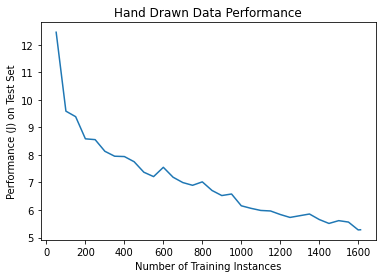

In [149]:
dig_j,dig_count = nn.k_fold(dig_fold,dig_vals,[[64,128,10]],0.1,0.0001,5,50,get_j=True)
plt.plot(dig_count,dig_j)
plt.xlabel('Number of Training Instances')
plt.ylabel('Performance (J) on Test Set')
plt.title('Hand Drawn Data Performance')
plt.show()

Briefly discuss and interpret these graphs

> This graph shows a clear downward trend in cost as the number of training instances increase, which is to be expected of neural networks.

### 2. K-NN

**2.1** discuss which algorithms you decided to test on each dataset and why
> For the hand drawn numbers dataset, we decided to use K-NN due to the fact that drawings of the same numbers would likely be very close to each other in terms of euclidean distance of pixels, as well as the data all being numeric.

In [206]:
def test_decision_knn(train_set,test_set,vals,k_vals,fold_metrics):
    test_copy = pd.DataFrame(test_set,copy=True)
    to_guess = test_copy.drop('class',axis=1)
    predictions = pd.DataFrame(to_guess.apply(lambda row: knn(k_vals,train_set,row), axis=1),columns=['predicted'])
    predictions['actual'] = test_set.loc[predictions.index,'class']

    for i in range(len(k_vals)):
        prec,rec,f1 = [0,0,0]
        for val in vals:
            is_targ = predictions[predictions.predicted.apply(lambda x: x[i] == val)]
            not_targ = predictions[predictions.predicted.apply(lambda x: x[i] != val)]
            tp = len(is_targ[is_targ['predicted'].str[i] == is_targ['actual']])
            fp = len(is_targ[is_targ['predicted'].str[i] != is_targ['actual']])
            fn = len(not_targ[not_targ.actual.apply(lambda x: x == val)])
            tn = len(not_targ[not_targ.actual.apply(lambda x: x != val)])
            this_prec = (tp/(tp+fp)) if (tp+fp) > 0 else 0
            this_rec = (tp/(tp+fn)) if (tp+fn) > 0 else 0
            f1 += (this_prec*this_rec*2)/(this_rec+this_prec) if (this_rec+this_prec) > 0 else 0
            prec += this_prec
            rec += this_rec

        avg_f1 = f1/len(vals)
        accuracy = len(predictions[predictions['predicted'].str[i] == predictions['actual']])/len(test_set)
        fold_metrics[k_vals[i]].append((accuracy,avg_f1))

def knn(k_vals,data,instance):
        out = []
        distances = data.apply(lambda row: math.dist(row.drop('class'),instance), axis=1)
        sorted_dist = distances.sort_values()
        for k in k_vals:
            #get k closest instances (including the input instance)
            k_neighbors = sorted_dist[:k]
            #get class value with largest number of occurences
            out.append(data.loc[k_neighbors.index,['class']]['class'].mode()[0])
        return out


np.random.seed(1)
k = 10
#function to do cross fold validation
def k_fold_jnn(fold,vals,j_vals):
    fold_metrics = defaultdict(list)
    #iterate through folds, taking turns being test fold
    for i in range(k):
        test_fold = fold[i]
        train_fold = fold[0:i]
        train_fold.extend(fold[i+1:len(fold)])
        train_data = pd.concat(train_fold)
        test_decision_knn(train_data,test_fold,vals,j_vals,fold_metrics)
            
    return fold_metrics

def dig_test_knn(dig_fold,dig_vals,j_vals):
    knn_res = k_fold_jnn(dig_fold,dig_vals,j_vals)
    j_dict = defaultdict(list)

    for j,perf in knn_res.items():
        avg_acc,avg_f1 = [0,0]
        for res in perf:
            avg_acc += res[0]
            avg_f1 += res[1]
        j_dict['Num Neighbors'].append(j)
        j_dict['Accuracy'].append(avg_acc/10)
        j_dict['F1'].append(avg_f1/10)

    j_table = pd.DataFrame(j_dict)
    print(j_table)
    return knn_res

In [6]:
digits = datasets.load_digits(as_frame=True)
dig_df = digits['data']
dig_df['class'] = digits['target']
dig_df = (dig_df - dig_df.min()) / (dig_df.max() - dig_df.min())
dig_df.fillna(0,inplace=True)
dig_class_0 = dig_df.loc[dig_df['class'] == 0].sample(frac=1)
dg0_split =  np.array_split(dig_class_0,k)
dig_class_1 = dig_df.loc[dig_df['class'] == 1/9].sample(frac=1)
dg1_split =  np.array_split(dig_class_1,k)
dig_class_2 = dig_df.loc[dig_df['class'] == 2/9].sample(frac=1)
dg2_split =  np.array_split(dig_class_2,k)
dig_class_3 = dig_df.loc[dig_df['class'] == 3/9].sample(frac=1)
dg3_split =  np.array_split(dig_class_3,k)
dig_class_4 = dig_df.loc[dig_df['class'] == 4/9].sample(frac=1)
dg4_split =  np.array_split(dig_class_4,k)
dig_class_5 = dig_df.loc[dig_df['class'] == 5/9].sample(frac=1)
dg5_split =  np.array_split(dig_class_5,k)
dig_class_6 = dig_df.loc[dig_df['class'] == 6/9].sample(frac=1)
dg6_split =  np.array_split(dig_class_6,k)
dig_class_7 = dig_df.loc[dig_df['class'] == 7/9].sample(frac=1)
dg7_split =  np.array_split(dig_class_7,k)
dig_class_8 = dig_df.loc[dig_df['class'] == 8/9].sample(frac=1)
dg8_split =  np.array_split(dig_class_8,k)
dig_class_9 = dig_df.loc[dig_df['class'] == 9/9].sample(frac=1)
dg9_split =  np.array_split(dig_class_9,k)

dig_vals = [0,1/9,2/9,3/9,4/9,5/9,6/9,7/9,8/9,9/9]
#list to hold folds
dig_fold = []
for i in range(k):
    this_fold = [dg0_split[i],dg1_split[i],dg2_split[i],dg3_split[i],dg4_split[i],dg5_split[i],dg6_split[i],dg7_split[i],dg8_split[i],dg9_split[i]]
    dig_fold.append(pd.concat(this_fold))


**2.3** To obtain the best performance possible, you should carefully adjust the hyper-parameters of each
algorithm when deployed on a dataset

In [30]:
j_vals = [1,10,20,30,40,50,60,70,80,90,100]
j_res = dig_test_knn(dig_fold,dig_vals,j_vals)

    Num Neighbors  Accuracy        F1
0               1  0.986578  0.986543
1              10  0.983294  0.983319
2              20  0.977175  0.976962
3              30  0.966028  0.965733
4              40  0.961546  0.961062
5              50  0.952601  0.952120
6              60  0.944879  0.944565
7              70  0.939832  0.939233
8              80  0.932074  0.931231
9              90  0.931525  0.930757
10            100  0.926557  0.925694


**2.4** After analyzing the performance of each algorithm under different hyper-parameters,
identify the best hyper-parameter setting

> From testing, using low number of neighbors yielded the best results, showing a clear decrease in accuracy as the value of K increased. The best hyper-parameter setting to use we identified was K = 1

**2.5** For each dataset, and considering the best hyper-parameter setting for each selected algorithm, construct
relevant learning curves and/or graphs

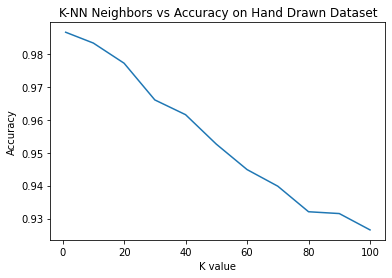

In [31]:
j_vals = []
j_acc = []
for j,perf in j_res.items():
    avg_acc,avg_f1 = [0,0]
    for res in perf:
        avg_acc += res[0]
        avg_f1 += res[1]
    j_acc.append(avg_acc/10)
    j_vals.append(j)

plt.plot(j_vals,j_acc)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("K-NN Neighbors vs Accuracy on Hand Drawn Dataset")
plt.show()

Briefly discuss and interpret these graphs

> This graph shows a clear downward accuracy as K increases. K-NN peformed very well on this dataset, which is likely due to the nature of how hand drawn numbers are stored; since each instance represents pixel values in the drawn image, we would expect that the training data point closest to our test instance in terms of euclidean distance is in fact the expected output.


## Titanic Dataset

**Models Used:**
- Neural Network
- Decision tree

### 1. Neural Network

**1.1** discuss which algorithms you decided to test on each dataset and why
> For the titanic dataset, we decided to use a neural network due to the large sample size and mostly numeric data.

In [210]:
tit_df = pd.read_csv('titanic.csv')
tit_df = pd.get_dummies(tit_df.drop('Name',axis=1),columns=['Sex'],drop_first=True,dtype=float)
fixed_df = tit_df.drop('Survived',axis=1)
fixed_df['class'] = tit_df['Survived']
fixed_df = (fixed_df - fixed_df.min()) / (fixed_df.max() - fixed_df.min())
fixed_df.fillna(0,inplace=True)
fixed_df.insert(0,'bias',1)
tit_class_0 = fixed_df.loc[fixed_df['class'] == 0].sample(frac=1)
tit_class_0['class'] = [[1,0]] * len(tit_class_0)
t0_split =  np.array_split(tit_class_0,k)
tit_class_1 = fixed_df.loc[fixed_df['class'] == 1].sample(frac=1)
tit_class_1['class'] = [[0,1]] * len(tit_class_1)
t1_split =  np.array_split(tit_class_1,k)

k = 10
tit_vals = [[1,0],[0,1]]
#list to hold folds
tit_fold = []
for i in range(k):
    this_fold = [t0_split[i],t1_split[i]]
    tit_fold.append(pd.concat(this_fold))

**1.3** To obtain the best performance possible, you should carefully adjust the hyper-parameters of each
algorithm when deployed on a dataset

In [20]:
tit_nn_arc = [[6,4,2],[6,8,2],[6,16,2],[6,8,16,2],[6,8,16,16,2]]
hyper_params = [[0.05,0.001,3,25],[0.05,0.001,7,25],[0.05,0.0001,3,25],[0.05,0.0001,7,25]]
for params in hyper_params:
    dig_test(tit_fold,tit_vals,tit_nn_arc,params[0],params[1],params[2],params[3])

lamb = 0.05 eps = 0.001 alpha = 3 batch_size = 25
        Architecture  Accuracy        F1
0          [6, 4, 2]  0.784920  0.768958
1          [6, 8, 2]  0.789453  0.774124
2         [6, 16, 2]  0.792823  0.777292
3      [6, 8, 16, 2]  0.784933  0.769552
4  [6, 8, 16, 16, 2]  0.770185  0.732146
lamb = 0.05 eps = 0.001 alpha = 7 batch_size = 25
        Architecture  Accuracy        F1
0          [6, 4, 2]  0.790551  0.773858
1          [6, 8, 2]  0.783784  0.767896
2         [6, 16, 2]  0.789453  0.775258
3      [6, 8, 16, 2]  0.788291  0.772513
4  [6, 8, 16, 16, 2]  0.791674  0.775615
lamb = 0.05 eps = 0.0001 alpha = 3 batch_size = 25
        Architecture  Accuracy        F1
0          [6, 4, 2]  0.784908  0.768253
1          [6, 8, 2]  0.793960  0.778619
2         [6, 16, 2]  0.787193  0.772083
3      [6, 8, 16, 2]  0.792798  0.776038
4  [6, 8, 16, 16, 2]  0.791687  0.775201
lamb = 0.05 eps = 0.0001 alpha = 7 batch_size = 25
        Architecture  Accuracy        F1
0          [6, 4, 2

In [203]:
tit_nn_arc = [[6,8,2],[6,128,2],[6,16,2],[6,128,128,2],[6,16,32,16,2],[6,16,32,32,16,2]]
hyper_params = [[0.1,0.0001,2,20],[0.1,0.0001,7,20],[0.1,0.0001,2,25],[0.1,0.0001,7,25]]
for params in hyper_params:
    dig_test(tit_fold,tit_vals,tit_nn_arc,params[0],params[1],params[2],params[3])

lamb = 0.1 eps = 0.0001 alpha = 2 batch_size = 20
             Architecture  Accuracy        F1
0               [6, 8, 2]  0.787155  0.770646
1             [6, 128, 2]  0.753293  0.747549
2              [6, 16, 2]  0.787193  0.771480
3        [6, 128, 128, 2]  0.755528  0.751763
4      [6, 16, 32, 16, 2]  0.788291  0.773472
5  [6, 16, 32, 32, 16, 2]  0.783809  0.769452
lamb = 0.1 eps = 0.0001 alpha = 7 batch_size = 20
             Architecture  Accuracy        F1
0               [6, 8, 2]  0.788329  0.773561
1             [6, 128, 2]  0.685758  0.684840
2              [6, 16, 2]  0.777041  0.763296
3        [6, 128, 128, 2]  0.666302  0.660193
4      [6, 16, 32, 16, 2]  0.767976  0.756175
5  [6, 16, 32, 32, 16, 2]  0.760073  0.724336
lamb = 0.1 eps = 0.0001 alpha = 2 batch_size = 25
             Architecture  Accuracy        F1
0               [6, 8, 2]  0.786031  0.769922
1             [6, 128, 2]  0.782533  0.770359
2              [6, 16, 2]  0.789453  0.773901
3        [6, 128, 128,

**1.4** After analyzing the performance of each algorithm under different hyper-parameters,
identify the best hyper-parameter setting

> From testing, using the best accuracy we could achieve was with lamb = 0.05 eps = 0.0001 alpha = 3 batch_size = 25 using an architecture with one hidden layer containing 8 neurons: [6,8,2]

**1.5** For each dataset, and considering the best hyper-parameter setting for each selected algorithm, construct
relevant learning curves and/or graphs

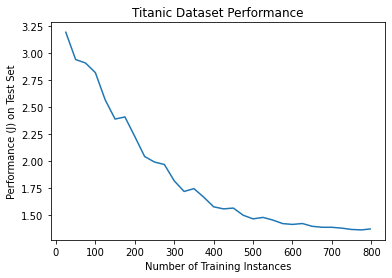

In [213]:
tit_j,tit_count = nn.k_fold(tit_fold,tit_vals,[[6,8,2]],0.05,0.0001,3,25,get_j=True)
plt.plot(tit_count,tit_j)
plt.xlabel('Number of Training Instances')
plt.ylabel('Performance (J) on Test Set')
plt.title('Titanic Dataset Performance')
plt.show()

Briefly discuss and interpret these graphs

> This graph shows an reduction in cost as training instances increases, which is expected of neural nets. The general performance of this model on the titanic data set is quite low ~80% showing similar performance to other models. This could be due to the fact that determining survival is not easy to determing based on the information given.

### 2. Decision Tree

**2.1** discuss which algorithms you decided to test on each dataset and why
> For the titanic dataset, we decided to use a decision due to the large sample size. For a smaller dataset, we would have likely used a random forest instead to avoid overfitting.

In [2]:
titanic_data_read = pd.read_csv('titanic.csv')
titanic_data = pd.get_dummies(titanic_data_read.drop('Name',axis=1),columns=['Sex'],drop_first=True)
titanic_data = titanic_data.drop('Survived',axis=1)
titanic_data['class'] = titanic_data_read['Survived']
titanic_attr = defaultdict(list)
attr_list = list(titanic_data.columns.values)
attr_list.remove('class')
titanic_targets = [0,1]

k = 10

#split data by class into k groups then combine into folds
tit_class_0 = titanic_data.loc[titanic_data['class'] == 0].sample(frac=1)
td0_split = np.array_split(tit_class_0,k)
tit_class_1 = titanic_data.loc[titanic_data['class'] == 1].sample(frac=1)
td1_split = np.array_split(tit_class_1,k)

titanic_fold = []
for i in range(k):
    this_fold = [td0_split[i],td1_split[i]]
    titanic_fold.append(pd.concat(this_fold))

In [3]:
def decision_tree_knn(titanic_fold,attr_list,titanic_attr,titanic_targets,depth,min_size_split,maj_prop,for_graph=False):
    #for depth in max_depth_arr:
    fold_metrics_titanic = rf.k_fold(titanic_fold,attr_list,titanic_attr,titanic_targets,[1],do_forest = False, max_depth=depth,min_size_split=min_size_split,maj_prop=maj_prop)
    n_acc = []
    n_prec = []
    n_rec = []
    n_f1 = []

    for n,perf in fold_metrics_titanic.items():
        avg_accuracy,avg_prec,avg_rec,avg_f1 = [0,0,0,0]
        for res in perf:
            avg_accuracy += res[0]
            avg_prec += res[1]
            avg_rec += res[2]
            avg_f1 += res[3]
        n_acc.append(avg_accuracy/10)
        n_prec.append(avg_prec/10)
        n_rec.append(avg_rec/10)
        n_f1.append(avg_f1/10)

    if for_graph:
        return n_acc
    
    print(f'max_depth: {depth} min_size_split: {min_size_split} maj prop: {maj_prop}')
    print("Accuracy: ", n_acc)
    print("Precision", n_prec)
    print("Recall", n_rec)
    print("F1", n_f1)


**2.3** To obtain the best performance possible, you should carefully adjust the hyper-parameters of each
algorithm when deployed on a dataset

In [230]:
hyper_params = [[6,10,0.875],[7,10,0.875],[8,10,0.875],[9,10,0.875],[10,10,0.875]]
for params in hyper_params:
    decision_tree_knn(titanic_fold,attr_list,titanic_attr,titanic_targets,params[0],params[1],params[2])

max_depth: 6 min_size_split: 10 maj prop: 0.875
Accuracy:  [0.7833546135512428]
Precision [0.7763838658091624]
Recall [0.7592722745663922]
F1 [0.7643430828668846]
max_depth: 7 min_size_split: 10 maj prop: 0.875
Accuracy:  [0.8094784927930995]
Precision [0.8096850489334951]
Recall [0.7895017400899753]
F1 [0.7928574015108906]
max_depth: 8 min_size_split: 10 maj prop: 0.875
Accuracy:  [0.7867889569855862]
Precision [0.7831971411783987]
Recall [0.7622012845542256]
F1 [0.7676562726774813]
max_depth: 9 min_size_split: 10 maj prop: 0.875
Accuracy:  [0.7936196231982748]
Precision [0.7936733247493835]
Recall [0.7711173358232181]
F1 [0.7749397219374048]
max_depth: 10 min_size_split: 10 maj prop: 0.875
Accuracy:  [0.8059556236522528]
Precision [0.8055203103948367]
Recall [0.7842510539569363]
F1 [0.7893199599303956]


In [231]:
hyper_params = [[7,8,0.875],[7,10,0.875],[7,12,0.875],[7,14,0.875],[7,16,0.875]]
for params in hyper_params:
    decision_tree_knn(titanic_fold,attr_list,titanic_attr,titanic_targets,params[0],params[1],params[2])

max_depth: 7 min_size_split: 8 maj prop: 0.875
Accuracy:  [0.7868525139030756]
Precision [0.7815060899650035]
Recall [0.7611036131624366]
F1 [0.7666713072748895]
max_depth: 7 min_size_split: 10 maj prop: 0.875
Accuracy:  [0.8013715809783226]
Precision [0.8034633941103706]
Recall [0.7734497637438814]
F1 [0.7809410193867494]
max_depth: 7 min_size_split: 12 maj prop: 0.875
Accuracy:  [0.8059805924412666]
Precision [0.8093006763334332]
Recall [0.7771954842543078]
F1 [0.7838276282816296]
max_depth: 7 min_size_split: 14 maj prop: 0.875
Accuracy:  [0.7902729542617184]
Precision [0.785550279759695]
Recall [0.7693785190844015]
F1 [0.7737302132279205]
max_depth: 7 min_size_split: 16 maj prop: 0.875
Accuracy:  [0.7845928384973329]
Precision [0.7778822794683296]
Recall [0.7597964236199531]
F1 [0.76500591853942]


In [232]:
hyper_params = [[7,8,0.85],[7,8,0.875],[7,8,0.9],[7,8,0.925],[7,8,0.95],]
for params in hyper_params:
    decision_tree_knn(titanic_fold,attr_list,titanic_attr,titanic_targets,params[0],params[1],params[2])

max_depth: 7 min_size_split: 8 maj prop: 0.85
Accuracy:  [0.7902494041538984]
Precision [0.7848700728138863]
Recall [0.7660349998585293]
F1 [0.7717361595535912]
max_depth: 7 min_size_split: 8 maj prop: 0.875
Accuracy:  [0.8094529565316083]
Precision [0.810839575056327]
Recall [0.783710352828]
F1 [0.7900802855947241]
max_depth: 7 min_size_split: 8 maj prop: 0.9
Accuracy:  [0.8049826920894336]
Precision [0.8052916894827126]
Recall [0.7819602184308068]
F1 [0.7873162888353912]
max_depth: 7 min_size_split: 8 maj prop: 0.925
Accuracy:  [0.7844535240040859]
Precision [0.7782514870143593]
Recall [0.760709334238746]
F1 [0.7652106824381794]
max_depth: 7 min_size_split: 8 maj prop: 0.95
Accuracy:  [0.7981903302689819]
Precision [0.7996295711975768]
Recall [0.768829612653142]
F1 [0.7773198110970176]


**2.4** After analyzing the performance of each algorithm under different hyper-parameters,
identify the best hyper-parameter setting

> From testing, using the best accuracy we could achieve was with max depth of 7, minimum size split of 8, and majority prop value of 0.9

**2.5** For each dataset, and considering the best hyper-parameter setting for each selected algorithm, construct
relevant learning curves and/or graphs

In [4]:
accuracy_arr = []
for i in range(100):
    accuracy_arr.append(decision_tree_knn(titanic_fold,attr_list,titanic_attr,titanic_targets,7,8,0.9,True))

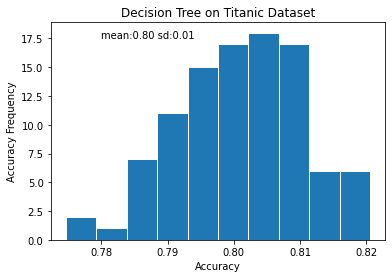

In [16]:
num_bins = 10
fixed_arr = [acc[0] for acc in accuracy_arr]
plt.hist(fixed_arr,bins=num_bins,edgecolor='white',linewidth=1)
plt.ylabel("Accuracy Frequency")
plt.xlabel("Accuracy")
plt.title("Decision Tree on Titanic Dataset")
plt.text(0.78,17.5,f'mean:{np.mean(accuracy_arr):.2f} sd:{np.std(accuracy_arr):.2f}')
plt.show()

Briefly discuss and interpret these graphs

> This graph shows the average accuracy over 100 iterations of the decision tree, yielding a mean of 80% accuracy with a standard deviation of about 1%. This performance is similar to the performance of neural nets, leading us to believe that the low accuracy is due to the nature of predicting titanic survival being hard (being lucky probably played a role in survival).

## Loan Eligibility Prediction Dataset

**Models Used:**
- K-NN
- Random Forests

### 1. K-NN

**1.1** discuss which algorithms you decided to test on each dataset and why
> For the loan dataset, we decided to use K-NN because we believed that people who are most similar to eachother based on the attributes would recieve the same loan status.

In [39]:
loan_df = pd.read_csv('loan.csv')
dum_df = pd.get_dummies(loan_df.drop('Loan_ID',axis=1),columns=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'],drop_first=True,dtype=float)
fixed_df = dum_df.drop('Loan_Status_Y',axis=1)
fixed_df.loc[fixed_df['Dependents'] == '3+','Dependents'] = 3
fixed_df['Dependents'] = pd.to_numeric(fixed_df['Dependents'])
fixed_df['class'] = dum_df['Loan_Status_Y']
fixed_df = (fixed_df - fixed_df.min()) / (fixed_df.max() - fixed_df.min())
fixed_df.fillna(0,inplace=True)
loan_class_0 = fixed_df.loc[fixed_df['class'] == 0].sample(frac=1)
l0_split =  np.array_split(loan_class_0,k)
loan_class_1 = fixed_df.loc[fixed_df['class'] == 1].sample(frac=1)
l1_split =  np.array_split(loan_class_1,k)

k = 10
loan_vals = [0,1]
#list to hold folds
loan_fold = []
for i in range(k):
    this_fold = [l0_split[i],l1_split[i]]
    loan_fold.append(pd.concat(this_fold))

In [51]:
j_vals = [1,5,10,15,20,30,40,50,60,70]
j_res = dig_test_knn(loan_fold,loan_vals,j_vals)

   Num Neighbors  Accuracy        F1
0              1  0.699818  0.630189
1              5  0.773054  0.682017
2             10  0.770973  0.676292
3             15  0.762636  0.628743
4             20  0.764763  0.636746
5             30  0.762458  0.620200
6             40  0.739671  0.563968
7             50  0.747831  0.575239
8             60  0.731245  0.530473
9             70  0.718657  0.495590


**1.4** After analyzing the performance of each algorithm under different hyper-parameters,
identify the best hyper-parameter setting

> From testing, using low number of neighbors yielded the best results, showing a decreasing trend as K grows larger than 5. The best hyper-parameter setting to use we identified was K = 5

**1.5** For each dataset, and considering the best hyper-parameter setting for each selected algorithm, construct
relevant learning curves and/or graphs

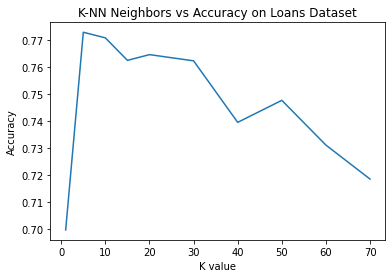

In [52]:
j_vals = []
j_acc = []
for j,perf in j_res.items():
    avg_acc,avg_f1 = [0,0]
    for res in perf:
        avg_acc += res[0]
        avg_f1 += res[1]
    j_acc.append(avg_acc/10)
    j_vals.append(j)

plt.plot(j_vals,j_acc)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("K-NN Neighbors vs Accuracy on Loans Dataset")
plt.show()

Briefly discuss and interpret these graphs

> This graph shows a large jump in accuracy from K = 1 to K = 5. For all K > 5, there is a clear downward trend in accuracy as K increases. This model did not perform well for the dataset, likely due to the fact that the loans dataset contains a large number of categorical variables.

## Oxford Parkingson's Disease Detection

**Models Used:**
- K-NN
- Random Forest

### 1. K-NN
**1.1** discuss which algorithms you decided to test on each dataset and why
> For the parkinsons dataset, we decided to use K-NN because all of the data is numeric.

In [42]:
park_df = pd.read_csv('parkinsons.csv')

park_fix = park_df.drop('Diagnosis',axis=1)
park_fix['class'] = park_df['Diagnosis']
park_fix = (park_fix - park_fix.min()) / (park_fix.max() - park_fix.min())
park_fix.fillna(0,inplace=True)
park_class_0 = park_fix.loc[park_fix['class'] == 0].sample(frac=1)
p0_split =  np.array_split(park_class_0,k)
park_class_1 = park_fix.loc[park_fix['class'] == 1].sample(frac=1)
p1_split =  np.array_split(park_class_1,k)

k = 10
park_vals = [0,1]
#list to hold folds
park_fold = []
for i in range(k):
    this_fold = [p0_split[i],p1_split[i]]
    park_fold.append(pd.concat(this_fold))

**1.4** After analyzing the performance of each algorithm under different hyper-parameters,
identify the best hyper-parameter setting

> From testing, using low number of neighbors yielded the best results, showing a clear decrease in accuracy as the value of K increased. The best hyper-parameter setting to use we identified was K = 1

**1.5** For each dataset, and considering the best hyper-parameter setting for each selected algorithm, construct
relevant learning curves and/or graphs

In [47]:
j_vals = [1,5,10,15,20,25,30,35,40,45,50]
j_res = dig_test_knn(park_fold,park_vals,j_vals)

    Num Neighbors  Accuracy        F1
0               1  0.964211  0.954831
1               5  0.928392  0.901292
2              10  0.891170  0.845451
3              15  0.840614  0.728745
4              20  0.829503  0.676902
5              25  0.815058  0.636132
6              30  0.830058  0.670143
7              35  0.835058  0.672254
8              40  0.830058  0.663797
9              45  0.810058  0.609038
10             50  0.794503  0.564036


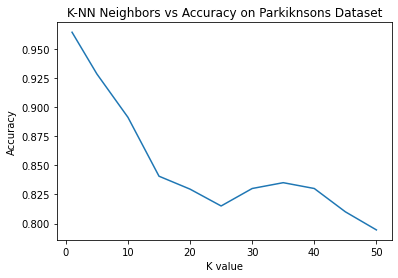

In [48]:
j_vals = []
j_acc = []
for j,perf in j_res.items():
    avg_acc,avg_f1 = [0,0]
    for res in perf:
        avg_acc += res[0]
        avg_f1 += res[1]
    j_acc.append(avg_acc/10)
    j_vals.append(j)

plt.plot(j_vals,j_acc)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("K-NN Neighbors vs Accuracy on Parkiknsons Dataset")
plt.show()

Briefly discuss and interpret these graphs

> This graph shows a clear downward accuracy as K increases. K-NN peformed very well on this dataset, which is likely due to the fact that the parkinsons data is all continuous and numeric.